In [8]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def laplace_mech_vec(vec, sensitivity, epsilon):
    return [v + np.random.laplace(loc=0, scale=sensitivity / epsilon) for v in vec]

def gaussian_mech(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)

def gaussian_mech_vec(vec, sensitivity, epsilon, delta):
    return [v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon)
            for v in vec]

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

data = pd.read_csv('https://github.com/TeemoXu/CS211_final/raw/main/bestsellers_with_categories.csv')

In [9]:
def range_query(df, col, a, b):
    return len(df[(df[col] >= a) & (df[col] < b)])

In [10]:
# for user rating column
random_lower_bounds_rating = [random.uniform(3, 4) for _ in range(100)]
random_workload_rating = [(lb, random.uniform(lb, 5)) for lb in random_lower_bounds_rating]
real_rates = [range_query(data, 'User Rating', lb, ub) for (lb, ub) in random_workload_rating]

# use for laplace mechnism 
def workload_laplace_vec(workload, epsilon):
    sensitivity = 1 * len(workload)
    answers = laplace_mech_vec([range_query(data, 'User Rating', lb, ub) for (lb, ub) in workload], sensitivity, epsilon)
    return answers
# use gaussian mechnism 
def workload_gaussian_vec(workload, epsilon, delta):
    sensitivity = np.sqrt(len(workload))
    answers = gaussian_mech_vec([range_query(data, 'User Rating', lb, ub) for (lb, ub) in workload], sensitivity, epsilon, delta)
    return answers

errors_lap_1 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_laplace_vec(random_workload_rating, 0.01))]
errors_lap_2 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_laplace_vec(random_workload_rating, 1.0))]
errors_lap_3 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_laplace_vec(random_workload_rating, 100.0))]
errors_gau_1 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_gaussian_vec(random_workload_rating, 0.01, 1e-5))]
errors_gau_2 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_gaussian_vec(random_workload_rating, 1.0, 1e-5))]
errors_gau_3 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_gaussian_vec(random_workload_rating, 100.0, 1e-5))]

print("When epsilon == 0.01 ------------------------------------------------")
print('Average absolute error for laplace mechnism:', np.mean(errors_lap_1))
print('Average absolute error for gaussion mechnism:', np.mean(errors_gau_1))
print("When epsilon == 1.0 ------------------------------------------------")
print('Average absolute error for laplace mechnism:', np.mean(errors_lap_2))
print('Average absolute error for gaussion mechnism:', np.mean(errors_gau_2))
print("When epsilon == 100.0 ------------------------------------------------")
print('Average absolute error for laplace mechnism:', np.mean(errors_lap_3))
print('Average absolute error for gaussion mechnism:', np.mean(errors_gau_3))

When epsilon == 0.01 ------------------------------------------------
Average absolute error for laplace mechnism: 9947.109493078578
Average absolute error for gaussion mechnism: 3776.58360760205
When epsilon == 1.0 ------------------------------------------------
Average absolute error for laplace mechnism: 108.6351821078789
Average absolute error for gaussion mechnism: 39.57762297704071
When epsilon == 100.0 ------------------------------------------------
Average absolute error for laplace mechnism: 0.7661222284945742
Average absolute error for gaussion mechnism: 0.40530726489165025


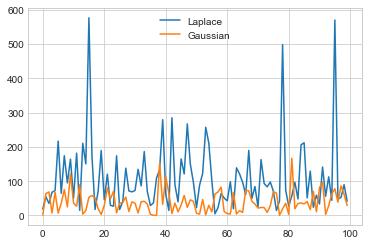

In [11]:
plt.plot(errors_lap_2, label='Laplace')
plt.plot(errors_gau_2, label='Gaussian');
plt.legend();

In [12]:
# for user price column
random_lower_bounds_pricing = [random.randint(1, 70) for _ in range(100)]
random_workload_pricing = [(lb, random.uniform(lb, 110)) for lb in random_lower_bounds_pricing]
real_rates = [range_query(data, 'Price', lb, ub) for (lb, ub) in random_workload_pricing]

# use laplace mechnism 
def workload_laplace_vec(workload, epsilon):
    sensitivity = 1 * len(workload)
    answers = laplace_mech_vec([range_query(data, 'Price', lb, ub) for (lb, ub) in workload], sensitivity, epsilon)
    return answers

# use gaussian mechnism 
def workload_gaussian_vec(workload, epsilon, delta):
    sensitivity = np.sqrt(len(workload))
    answers = gaussian_mech_vec([range_query(data, 'Price', lb, ub) for (lb, ub) in workload], sensitivity, epsilon, delta)
    return answers

errors_lap_1 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_laplace_vec(random_workload_pricing, 0.01))]
errors_lap_2 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_laplace_vec(random_workload_pricing, 1.0))]
errors_lap_3 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_laplace_vec(random_workload_pricing, 100.0))]
errors_gau_1 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_gaussian_vec(random_workload_pricing, 0.01, 1e-5))]
errors_gau_2 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_gaussian_vec(random_workload_pricing, 1.0, 1e-5))]
errors_gau_3 = [abs(r_a - l_a) for (r_a, l_a) in zip(real_rates, workload_gaussian_vec(random_workload_pricing, 100.0, 1e-5))]

print("When epsilon == 0.01 ------------------------------------------------")
print('Average absolute error for laplace mechnism:', np.mean(errors_lap_1))
print('Average absolute error for gaussion mechnism:', np.mean(errors_gau_1))
print("When epsilon == 1.0 ------------------------------------------------")
print('Average absolute error for laplace mechnism:', np.mean(errors_lap_2))
print('Average absolute error for gaussion mechnism:', np.mean(errors_gau_2))
print("When epsilon == 100.0 ------------------------------------------------")
print('Average absolute error for laplace mechnism:', np.mean(errors_lap_3))
print('Average absolute error for gaussion mechnism:', np.mean(errors_gau_3))

When epsilon == 0.01 ------------------------------------------------
Average absolute error for laplace mechnism: 10316.46170366033
Average absolute error for gaussion mechnism: 3653.8653744617327
When epsilon == 1.0 ------------------------------------------------
Average absolute error for laplace mechnism: 95.7394506623284
Average absolute error for gaussion mechnism: 39.53840152887785
When epsilon == 100.0 ------------------------------------------------
Average absolute error for laplace mechnism: 0.9781988585020014
Average absolute error for gaussion mechnism: 0.4304773769040499


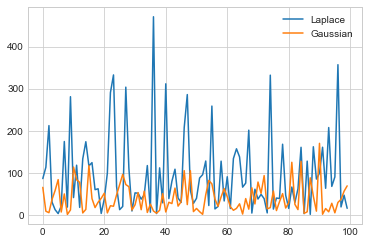

In [13]:
plt.plot(errors_lap_2, label='Laplace')
plt.plot(errors_gau_2, label='Gaussian');
plt.legend();